# Test the custom video dataset class

Using a small subset of the class

### Torch setup

In [1]:
import torch
from torch import nn

print("Using PyTorch version:", torch.__version__)

Using PyTorch version: 2.7.1+cu126


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


### Explore data

In [3]:
import os

data_path = "../data/"
split_path = data_path + "splits/asl100.json"
raw_path = data_path + "WLASL2000/"
print(f"split path exists: {os.path.exists(split_path)}\n")
print(f"raw videos path exists: {os.path.exists(raw_path)}\n")

split path exists: True

raw videos path exists: True



In [4]:
from video_dataset import VideoDataset
# prep_train, test and val have already been run
instances_path = './preprocessed_labels/asl100/train_instances.json'
classes_path = './preprocessed_labels/asl100/train_classes.json'
train_dataset = VideoDataset(raw_path, 'train', instances_path, classes_path)

print(f"Number of training samples: {len(train_dataset)}")


Number of training samples: 1442


Label: 0	book
Random frame index: 61
Frame shape: torch.Size([3, 240, 119])


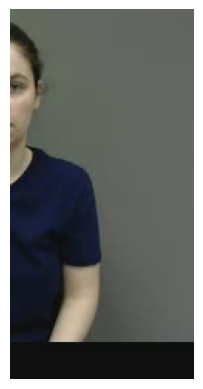

In [5]:
import cv2 
import random
import matplotlib.pyplot as plt

first_item = train_dataset[0]
frames = first_item['frames']
label_num = first_item['label_num']
classes_path = './wlasl_class_list.txt'
with open(classes_path, 'r') as f:
  class_list = f.read().splitlines()
print(f"Label: {class_list[label_num]}")
rand_num = random.randint(0, len(frames) - 1)
print(f"Random frame index: {rand_num}")
frame = frames[rand_num]
print(f"Frame shape: {frame.shape}")
#convert to numpy array
np_frame = frame.permute(1, 2, 0).cpu().numpy()
plt.imshow(np_frame)
plt.axis('off')
plt.show()


Random frame index: 45
Frame shape: torch.Size([3, 240, 119])


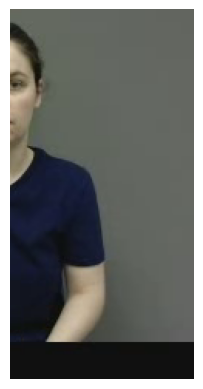

In [6]:
rand_num = random.randint(0, len(frames) - 1)
print(f"Random frame index: {rand_num}")
frame = frames[rand_num]
print(f"Frame shape: {frame.shape}")
#convert to numpy array
np_frame = frame.permute(1, 2, 0).cpu().numpy()
plt.imshow(np_frame)
plt.axis('off')
plt.show()

### There seem to be some issues with cropping

Random video index: 329
Label: 18	all
Number of frames: 50
Random frame index: 19
Frame shape: torch.Size([3, 240, 119])


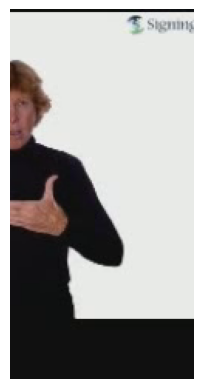

In [20]:
rand_vid = random.randint(0, len(train_dataset) - 1)
print(f"Random video index: {rand_vid}")
rand_item = train_dataset[rand_vid]
frames = rand_item['frames']
label_num = rand_item['label_num']
print(f"Label: {class_list[label_num]}")
print(f"Number of frames: {len(frames)}")
rand_frame = random.randint(0, len(frames) - 1)
print(f"Random frame index: {rand_frame}")
frame = frames[rand_frame]
print(f"Frame shape: {frame.shape}")
#convert to numpy array
np_frame = frame.permute(1, 2, 0).cpu().numpy()
plt.imshow(np_frame)
plt.axis('off')
plt.show()

Random frame index: 43
Frame shape: torch.Size([3, 240, 119])


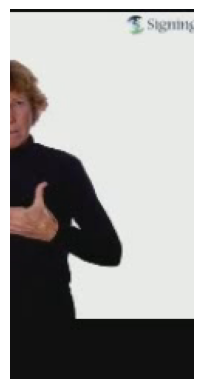

In [22]:
rand_frame = random.randint(0, len(frames) - 1)
print(f"Random frame index: {rand_frame}")
frame = frames[rand_frame]
print(f"Frame shape: {frame.shape}")
#convert to numpy array
np_frame = frame.permute(1, 2, 0).cpu().numpy()
plt.imshow(np_frame)
plt.axis('off')
plt.show()

### Videos appear to be cropped about halfway too far to the right

# Second try

The bounding boxes seem to be the problem, as they are all the same

In [22]:
from video_dataset import VideoDataset
import random
import matplotlib.pyplot as plt
# prep_train, test and val have already been run
instances_path = './preprocessed_labels/asl100/train_instances.json'
classes_path = './preprocessed_labels/asl100/train_classes.json'
train_dataset = VideoDataset(raw_path, 'train', instances_path, classes_path)
with open(classes_path, 'r') as f:
  class_list = f.read().splitlines()
print(f"Number of training samples: {len(train_dataset)}")

Number of training samples: 1442


Random video index: 25
Label: [
Number of frames: 92
Random frame index: 18
Frame shape: torch.Size([3, 256, 256])


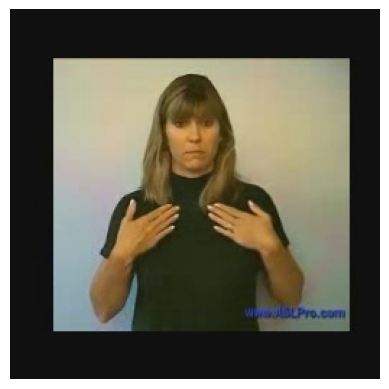

In [13]:

rand_vid = random.randint(0, len(train_dataset) - 1)
print(f"Random video index: {rand_vid}")
rand_item = train_dataset[rand_vid]
frames = rand_item['frames']
label_num = rand_item['label_num']
print(f"Label: {class_list[label_num]}")
print(f"Number of frames: {len(frames)}")
rand_frame = random.randint(0, len(frames) - 1)
print(f"Random frame index: {rand_frame}")
frame = frames[rand_frame]
print(f"Frame shape: {frame.shape}")
#convert to numpy array
np_frame = frame.permute(1, 2, 0).cpu().numpy()
plt.imshow(np_frame)
plt.axis('off')
plt.show()

Length distribution of video segments:
[63, 63, 46, 59, 95, 120, 92, 99, 79, 30, 86, 76, 94, 74, 57, 62, 72, 17, 27, 32, 32, 68, 89, 98, 78, 92, 103, 74, 81, 79, 45, 53, 88, 58, 64, 81, 57, 59, 60, 60, 54, 78, 47, 68, 44, 54, 54, 45, 104, 36, 47, 34, 41, 41, 50, 88, 71, 74, 101, 87, 66, 61, 75, 90, 68, 37, 37, 45, 38, 34, 54, 52, 54, 61, 39, 40, 95, 86, 57, 26, 64, 71, 76, 44, 31, 59, 46, 72, 91, 68, 41, 24, 40, 130, 50, 117, 46, 112, 79, 95, 78, 68, 31, 60, 19, 60, 101, 95, 97, 117, 99, 76, 64, 51, 38, 56, 38, 36, 71, 76, 76, 71, 49, 42, 91, 52, 53, 87, 54, 54, 51, 50, 61, 70, 77, 75, 87, 70, 54, 30, 57, 85, 79, 91, 117, 86, 97, 88, 77, 53, 53, 43, 83, 61, 64, 73, 31, 34, 78, 59, 131, 55, 60, 93, 40, 38, 55, 45, 86, 125, 62, 59, 74, 27, 73, 63, 49, 38, 60, 24, 64, 44, 66, 62, 101, 38, 67, 59, 60, 60, 111, 33, 28, 89, 50, 33, 63, 95, 69, 61, 91, 57, 107, 63, 83, 91, 32, 22, 32, 53, 54, 37, 33, 88, 100, 78, 77, 119, 59, 55, 63, 65, 67, 83, 54, 54, 32, 36, 47, 27, 56, 65, 60, 49, 57, 37,

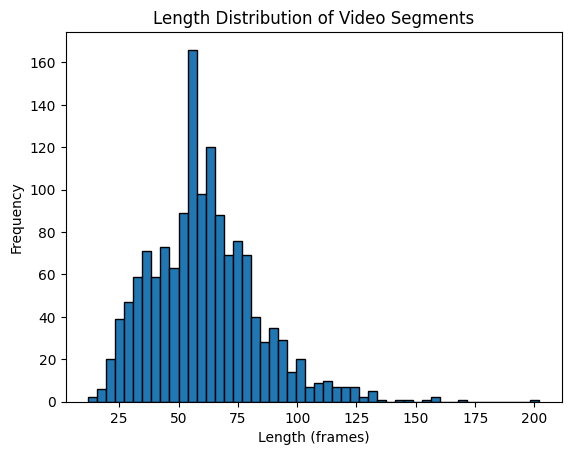

In [14]:
import json
def length_distribution(instances_path):
  with open(instances_path, 'r') as f:
    instances = json.load(f)
  lengths = [item['frame_end'] - item['frame_start'] for item in instances]
  print("Length distribution of video segments:")
  print(lengths)
  return lengths

lengths = length_distribution('./preprocessed_labels/asl100/train_instances.json')
#plot as histogram

plt.hist(lengths, bins=50, edgecolor='black')
plt.title('Length Distribution of Video Segments')
plt.xlabel('Length (frames)')
plt.ylabel('Frequency')
plt.show()

In [26]:
#collect outliers to output
with open(instances_path, 'r') as f:
  instances = json.load(f)
outliers = []

output = './output/outliers.txt'
for item in instances:
  length = item['frame_end'] - item['frame_start']
  if length > 125 or length < 25:
    outliers.append(item)
with open(output, 'w') as f:
  for outlier in outliers:
    f.write(f"{outlier}\n")
    
     
  

In [27]:
print(f"Outliers: \n{[outliers['video_id'] for outliers in outliers]}")

Outliers: 
['07071', '05742', '70230', '09853', '63232', '08924', '14885', '27211', '70306', '68992', '64219', '64283', '06477', '13200', '56573', '56576', '56577', '57632', '05631', '68350', '68070', '31762', '32146', '32162', '34738', '34742', '55361', '63207', '70132', '64090', '00618', '00633', '06334', '13330', '13331', '22956', '22959', '24651', '35514', '35515', '50044', '51229', '58503', '62249', '62250', '70357', '10892', '28210']


In [28]:
print(raw_path)

../data/WLASL2000/


In [29]:
from video_dataset import load_rgb_frames_from_video

def pad_frames(frames, target_length):
  num_frames = frames.shape[0]
  if num_frames == target_length:
    return frames
  elif num_frames < target_length:
    # Pad with zeros if the number of frames is less than the target length
    padding = torch.zeros(target_length - num_frames, frames.shape[1], frames.shape[2], frames.shape[3], device=frames.device)
    return torch.cat((frames, padding), dim=0)
  else:
    # Trim the frames if the number of frames is greater than the target length
    return frames[:target_length, :, :, :]  
#pick random outlier
rand_outlier = random.choice(outliers)
print(f"Random outlier: {rand_outlier}")
#load frames from video
frames = load_rgb_frames_from_video(raw_path, rand_outlier['video_id'],
                                    rand_outlier['frame_start'],
                                    rand_outlier['frame_end'])
print(f"Number of frames: {len(frames)}")
#pad frames to 125
padded_frames = pad_frames(frames, 125)
print(f"Number of padded frames: {len(padded_frames)}")


Random outlier: {'label_num': 56, 'frame_end': 20, 'frame_start': 1, 'video_id': '13331'}
Number of frames: 19
Number of padded frames: 125


### Great, seems to be working

In [ ]:
from torch.utils.data import DataLoader
import video_dataset
raw_path = '../data/WLASL2000/'
instances_path = './preprocessed_labels/asl100/train_instances.json'
classes_path = './preprocessed_labels/asl100/train_classes.json'
padded_length = 125
transform = lambda x: video_dataset.pad_frames(x, padded_length)
train_dataset = video_dataset.VideoDataset(raw_path, 'train', instances_path,
                                           classes_path, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True,num_workers=1)
train_loader
